# Titanic Dataset Survival Prediction - Machine Learning

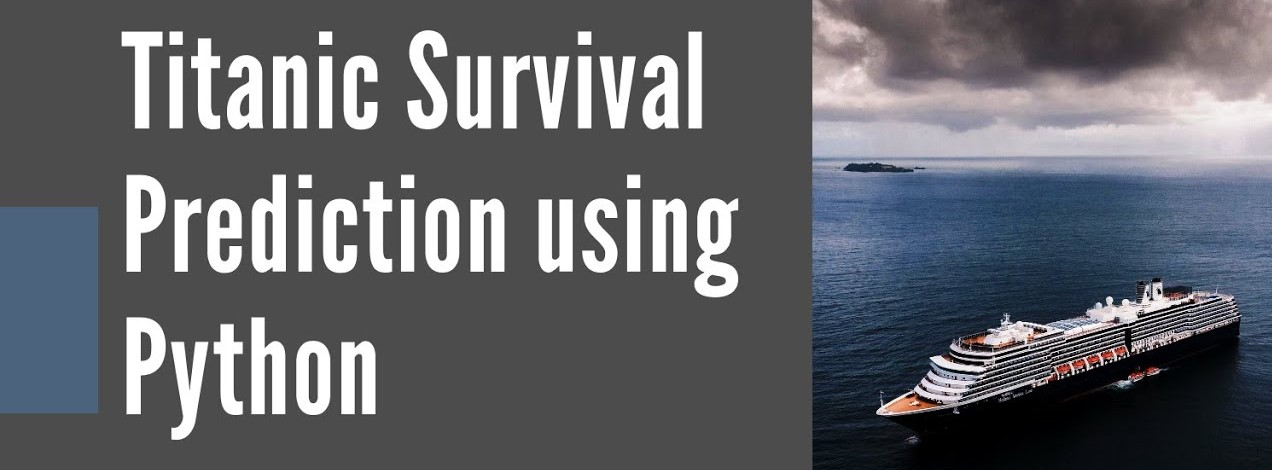

### In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

#### In this model, we’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.
#### Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.
#### The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s our job to predict these outcomes.
#### Using the patterns we find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

### Importing library

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing dataset

In [71]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

In [73]:
train.isnull().sum(),train.shape

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 (891, 12))

In [74]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

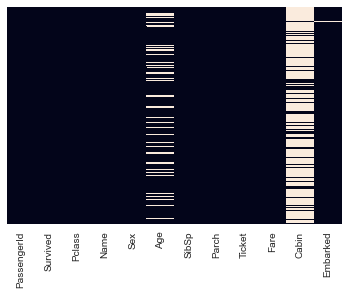

In [75]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

### We can see there is some Nan values in Age and Cabin column

<AxesSubplot:xlabel='Survived', ylabel='count'>

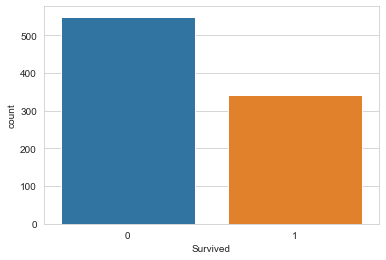

In [76]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

### We can see the death is more as compare to survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

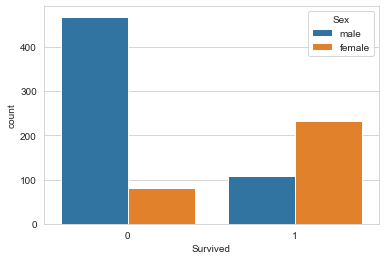

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

### Death of male passenger is high as compare female passenger

<AxesSubplot:xlabel='Survived', ylabel='count'>

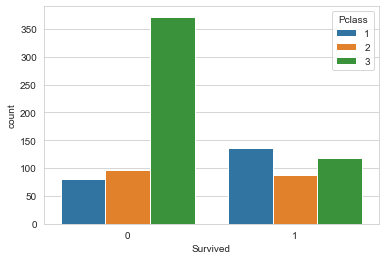

In [78]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

### Death rate is more in passenger class 3

<AxesSubplot:>

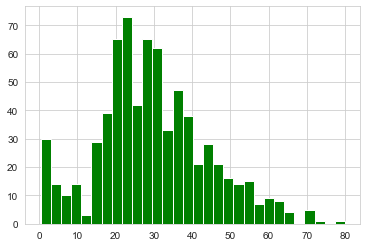

In [79]:
train['Age'].hist(bins=30,color='green')

### We can analyze here that death is more between the age of 20-30

<AxesSubplot:xlabel='SibSp', ylabel='count'>

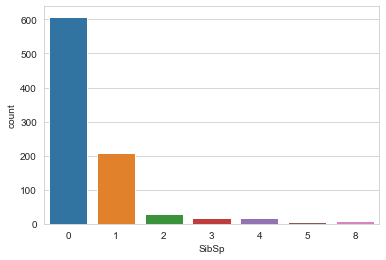

In [80]:
sns.countplot(x='SibSp',data=train)

### So here we can see that maximum people (ie around 600) have no Siblings/Spouses and around 200 have 1 spouse.

<AxesSubplot:>

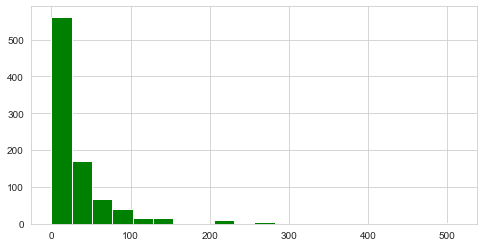

In [81]:
train['Fare'].hist(bins=20,color='green',figsize=(8,4))

<AxesSubplot:>

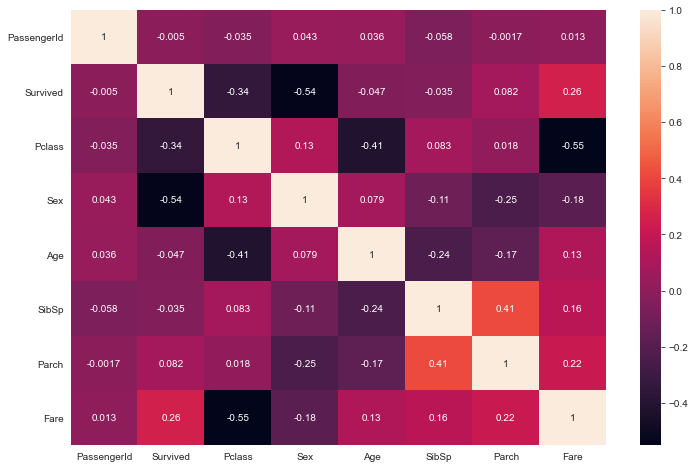

In [136]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)

### Maximum passenger in the ship have low price rate tickets.

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

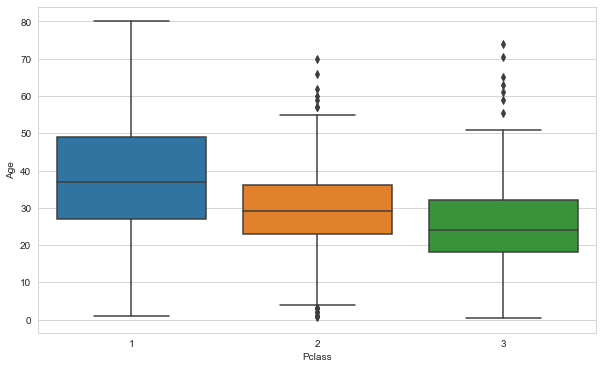

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [83]:
age_1=train[train['Pclass']==1]

In [84]:
age_1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,216.000000,216.000000,216.0,186.000000,216.000000,216.000000,216.000000
mean,461.597222,0.629630,1.0,38.233441,0.416667,0.356481,84.154687
std,246.737616,0.484026,0.0,14.802856,0.611898,0.693997,78.380373
min,2.000000,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,270.750000,0.000000,1.0,27.000000,0.000000,0.000000,30.923950
50%,472.000000,1.000000,1.0,37.000000,0.000000,0.000000,60.287500
75%,670.500000,1.000000,1.0,49.000000,1.000000,0.000000,93.500000
max,890.000000,1.000000,1.0,80.000000,3.000000,4.000000,512.329200


### Now we will use this average age values to impute based on Pclass for Age to remove the outliers

In [85]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
    
        elif Pclass==2:
            return 29
    
        else: 
            return 24
        
    else:   
            return Age

#### Now apply that function

In [86]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

#### Now lets check the heatmap again

<AxesSubplot:>

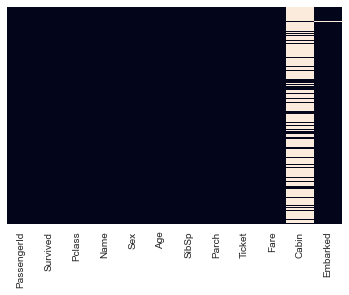

In [87]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

#### Lets drop our Cabin column Embarked that is NaN

In [88]:
train.drop(['Name','Ticket','Cabin','Embarked'],axis = 1,inplace=True)

#### Now lets see our heatmap again

<AxesSubplot:>

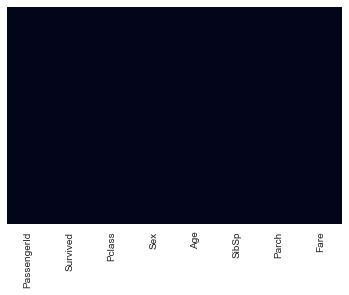

In [89]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

#### We have one categorical value ie Sex So we are converting male/female to 1 and 0 .

In [91]:
train['Sex'].replace(['female','male'],[0,1],inplace=True)

In [92]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


### Changing categorical value in test dataset to numerical value

In [93]:
test['Sex'].replace(['female','male'],[0,1],inplace=True)

In [94]:
test.drop(['Name','Ticket','Cabin','Embarked'],axis = 1,inplace=True)

In [95]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [97]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

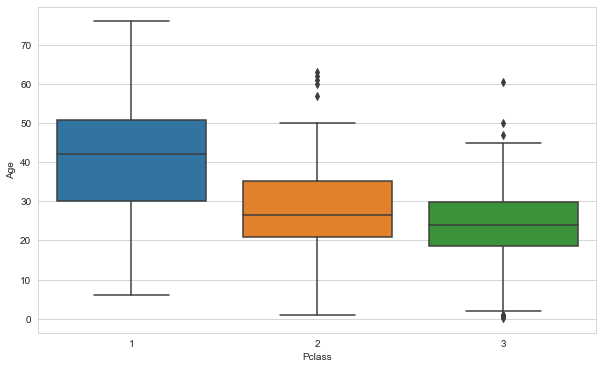

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=test)

In [99]:
age_2=test[test['Pclass']==1]
age_2.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
count,107.000000,107.0,107.000000,98.000000,107.000000,107.000000,107.000000
mean,1098.224299,1.0,0.532710,40.918367,0.476636,0.383178,94.280297
std,126.234232,0.0,0.501277,13.956799,0.604165,0.760398,84.435858
min,903.000000,1.0,0.000000,6.000000,0.000000,0.000000,0.000000
25%,979.000000,1.0,0.000000,30.000000,0.000000,0.000000,30.100000
50%,1094.000000,1.0,1.000000,42.000000,0.000000,0.000000,60.000000
75%,1211.500000,1.0,1.000000,50.750000,1.000000,1.000000,134.500000
max,1306.000000,1.0,1.000000,76.000000,3.000000,4.000000,512.329200


### Putting mean age value to test data categorised by passenger class

In [33]:
def impute_age1(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 41
    
        elif Pclass==2:
            return 26
    
        else: 
            return 24
        
    else:   
            return Age

In [100]:
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)

#### There is also one missing fare column we can adjust it by putting mean

In [113]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [114]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

<AxesSubplot:>

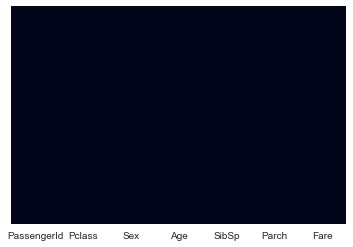

In [115]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

# Now from here we will apply our models

#### We want to predict whether the passenger got survived or not based on passenger_class,sex ,SibSp and Parch column

# Logistic Regression

In [116]:
x_train=train[['Pclass','Sex','SibSp','Parch','Age']]
y_train=train[['Survived']]
x_test=test[['Pclass','Sex','SibSp','Parch','Age']]

In [117]:
from sklearn.linear_model import LogisticRegression

In [140]:
lr=LogisticRegression()

In [141]:
lr.fit(x_train,y_train)

LogisticRegression()

In [142]:
y_pred=lr.predict(x_test)

In [143]:
from sklearn.metrics import accuracy_score
lr.score(x_train, y_train)
lr= round(lr.score(x_train, y_train) * 100, 2)
lr

80.81

#### accuracy score is 80.81 %

# Decision Tree

In [122]:
x_train=train[['Pclass','Sex','SibSp','Parch','Age']]
y_train=train[['Survived']]
x_test=test[['Pclass','Sex','SibSp','Parch','Age']]

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
dtr=DecisionTreeClassifier()

In [125]:
dtr.fit(x_train,y_train)

DecisionTreeClassifier()

In [126]:
y_pred=dtr.predict(x_test)

In [127]:
from sklearn.metrics import accuracy_score
dtr.score(x_train, y_train)
dtr= round(dtr.score(x_train, y_train) * 100, 2)
dtr

91.81

#### So the accuracy of this model is best

In [128]:
dff = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_pred})
dff[0:10]

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [52]:
dff.to_csv('Final_data.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [53]:
final_dataset=pd.read_csv('final_data_modified.csv')
final_dataset[0:10]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,892,3,male,34.5,0,0,Q,0
1,893,3,female,47.0,1,0,S,0
2,894,2,male,62.0,0,0,Q,1
3,895,3,male,27.0,0,0,S,1
4,896,3,female,22.0,1,1,S,1
5,897,3,male,14.0,0,0,S,0
6,898,3,female,30.0,0,0,Q,0
7,899,2,male,26.0,1,1,S,0
8,900,3,female,18.0,0,0,C,0
9,901,3,male,21.0,2,0,S,0


# So here is our result with 91.81% accuracy

#### Lets check Random Forest also

# Random Forest

In [129]:
x_train=train[['Pclass','Sex','SibSp','Age','Parch']]
y_train=train[['Survived']]
x_test=test[['Pclass','Sex','SibSp','Age','Parch']]

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rfc= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [132]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [133]:
y_pred=rfc.predict(x_test)

In [134]:
from sklearn.metrics import accuracy_score
rfc.score(x_train, y_train)
rfc= round(rfc.score(x_train, y_train) * 100, 2)
rfc

90.68